In [1]:
import pandas as pd
import numpy as np

In [2]:
#import mnist data from sklearn dataset 
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
#there are 70000 images with 784 features each is 28x28 pixels and intensity from 0 to 255
X, y = np.array(mnist["data"]), np.array (mnist["target"])
print(X.shape)
print(y.shape)



(70000, 784)
(70000,)


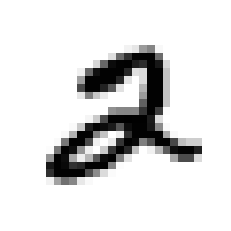

'2'

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[5]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = "binary")
plt.axis("off")
plt.show()

y[5]

In [5]:
#as target values are in string we will convert in numbers

y = y.astype(np.uint8)

In [6]:
#this dataset is already set into train_test data so it is shuffled soo no need to do cross-validation
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### trying on one digit (ex 5)

In [7]:
#trying to identify only one digit taking 5 for example
y_train_5 = (y_train == 5)
y_test_5 = (y_train == 5)

In [8]:
#stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)


SGDClassifier(random_state=42)

In [9]:
#predicting the value whether it is 5 or not!
sgd_clf.predict([X[0]])

array([ True])

In [10]:
#perfromance measurements using k-fold-cross-validation   (straified sampling)
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring = "accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [11]:
# accuracy is 90% but we have only 10 % of number 5 images soo accuracy is not use to measure classifiers
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1),dtype=bool)
    
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring = "accuracy")


array([0.91125, 0.90855, 0.90915])

In [12]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5,cv=3)

In [13]:
#confused matrix (needs predicts values and actual tragets values)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [14]:
from sklearn.metrics import precision_score, recall_score

print (precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5,y_train_pred))

0.8370879772350012
0.6511713705958311


In [15]:
from sklearn.metrics import f1_score
f1_score(y_train_5 , y_train_pred)

0.7325171197343846

In [40]:
y_scores = sgd_clf.decision_function([some_digit])
print(y_scores)
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

[[-15541.82888672 -29286.65271153   3512.16981303  -6832.08390768
  -19312.77223333  -9222.09311121 -33451.06615947 -21325.87368895
   -2296.78795949  -6958.23332214]]


array([[False, False, False, False, False, False, False, False, False,
        False]])

In [17]:
y_scores = cross_val_predict(sgd_clf, X_train , y_train_5, cv=3, method = "decision_function")


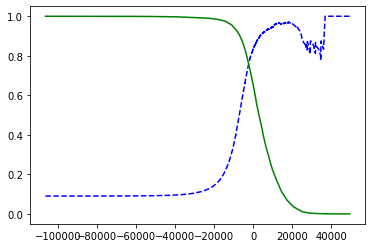

In [18]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_threshold(precisions, recalls , thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label = "precision")
    plt.plot(thresholds, recalls[:-1], "g-", label = "Recall")
plot_threshold(precisions, recalls, thresholds)
plt.show()

In [19]:
#looking for a low threhold value with higher precision (using argmax)
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] 

y_train_pred_90 = (y_scores >=threshold_90_precision)

In [20]:
#checking the predictions
#if recall is low then it is not fast with higher precision
print (precision_score(y_train_5, y_train_pred_90))
print (recall_score(y_train_5, y_train_pred_90))

0.9000345901072293
0.4799852425751706


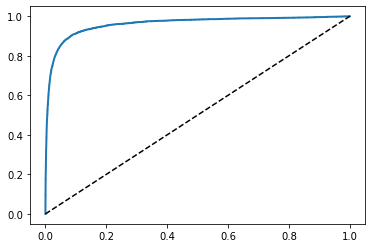

In [21]:
#ROC curve (Receiver operating characteristics) used for binary classifier

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plt_roc(fpr, tpr, label= None):
    plt.plot(fpr,tpr, linewidth =2, label =label)
    plt.plot([0,1],[0,1], 'k--')
#     plt.xlabel("False positive Rate")
#     plt.ylabel("True positive Rate (Recall)")
    
plt_roc(fpr,tpr)
plt.show()


In [22]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [23]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state= 42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv =3, method = "predict_proba")


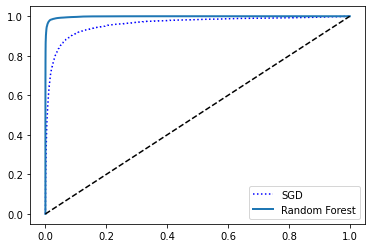

In [24]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

plt.plot(fpr,tpr,"b:", label = "SGD")
plt_roc(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc= "lower right")
plt.show()

In [25]:
print (roc_auc_score (y_train_5, y_scores_forest))

0.9983436731328145


In [26]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

array([2], dtype=uint8)

In [27]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 2.7442516 , -0.30125634,  9.31399134,  7.26965016,  3.75753908,
         3.74771902,  0.71155138,  2.76650678,  8.2765048 ,  6.21840456]])

In [28]:
print (np.argmax(some_digit_scores))
print (svm_clf.classes_)
print(svm_clf.classes_[2])

2
[0 1 2 3 4 5 6 7 8 9]
2


## Doing for all classes in the dataset

In [29]:
# to force svc to work on multiple classes (using onevsrest)
from sklearn.multiclass import OneVsRestClassifier
over_clf = OneVsRestClassifier(SVC())
# over_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC())

In [30]:
#saving model
import joblib
joblib.dump(over_clf, "mymodelpkl")

#mymodelloaded = joblib.load("mymodelpkl")

['mymodelpkl']

In [34]:
print (over_clf.predict([some_digit]))
print(len (over_clf.estimators_))

[2]
10


In [35]:
#doing stochastic gradient descent on all the classes

sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([2], dtype=uint8)

In [36]:
joblib.dump(sgd_clf, "mymodel_sgd_all")

['mymodel_sgd_all']

In [38]:
sgd_clf.decision_function([some_digit])

array([[-15541.82888672, -29286.65271153,   3512.16981303,
         -6832.08390768, -19312.77223333,  -9222.09311121,
        -33451.06615947, -21325.87368895,  -2296.78795949,
         -6958.23332214]])

In [39]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring= "accuracy")


array([0.87365, 0.85835, 0.8689 ])

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3,scoring = "accuracy")

array([0.8983, 0.891 , 0.9018])

In [42]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

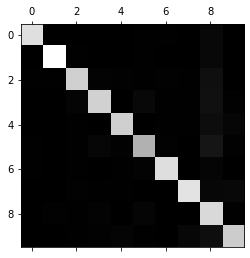

In [43]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

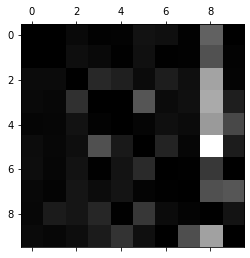

In [44]:
#finding errors based on number of images in each class
row_sums = conf_mx.sum(axis=1, keepdims = True)
norm_conf_mx = conf_mx/row_sums
#filling diagonal with 0 to only focus error
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap = plt.cm.gray)
plt.show()